In [248]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.simplefilter('ignore', FutureWarning)

import scipy
from scipy import stats
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [249]:
research_payments = pd.read_csv('data.csv')
research_payments.head(5)

,change_type,covered_recipient_type,noncovered_recipient_entity_name,teaching_hospital_ccn,teaching_hospital_id,teaching_hospital_name,physician_profile_id,physician_first_name,physician_middle_name,physician_last_name,...,preclinical_research_indicator,delay_in_publication_indicator,name_of_study,dispute_status_for_publication,record_id,program_year,payment_publication_date,clinicaltrials_gov_identifier,research_information_link,context_of_research
0,UNCHANGED,Covered Recipient Teaching Hospital,NaN,140091,9145,Carle Foundation Hospital,NaN,NaN,NaN,NaN,...,No,No,BIOFLOW-V,No,751904137,2020,01/21/2022,NaN,NaN,NaN
1,UNCHANGED,Covered Recipient Teaching Hospital,NaN,140010,9083,NORTHSHORE UNIVERSITY HEALTHSYSTEM,NaN,NaN,NaN,NaN,...,No,No,A RANDOMIZED DOUBLEBLIND PLACEBOCONTROLLED STU...,No,742932373,2020,01/21/2022,NaN,NaN,NaN
2,UNCHANGED,Covered Recipient Teaching Hospital,NaN,140010,9083,NORTHSHORE UNIVERSITY HEALTHSYSTEM,NaN,NaN,NaN,NaN,...,No,No,A LONGTERM OPEN LABEL EXTENSION STUDY OF PF066...,No,742935859,2020,01/21/2022,NaN,NaN,NaN
3,UNCHANGED,Covered Recipient Teaching Hospital,NaN,140010,9083,NORTHSHORE UNIVERSITY HEALTHSYSTEM,NaN,NaN,NaN,NaN,...,No,No,"A PHASE 2B, RANDOMIZED, DOUBLE-BLIND, PLACEBO-...",No,724445059,2020,01/21/2022,NCT03738423,NaN,NaN
4,UNCHANGED,Covered Recipient Teaching Hospital,NaN,140010,9083,Northshore University Healthsystem,NaN,NaN,NaN,NaN,...,No,No,"A 56-week, Multicenter, Open-label, Active-con...",No,744072947,2020,01/21/2022,NaN,NaN,NaN


In [250]:
niche_df = research_payments[['teaching_hospital_name', 'recipient_city', 'name_of_study', 'total_amount_of_payment_usdollars', 'submitting_applicable_manufacturer_or_applicable_gpo_name']]
niche_df

,teaching_hospital_name,recipient_city,name_of_study,total_amount_of_payment_usdollars,submitting_applicable_manufacturer_or_applicable_gpo_name
0,Carle Foundation Hospital,URBANA,BIOFLOW-V,1000.00,BIOTRONIK INC.
1,NORTHSHORE UNIVERSITY HEALTHSYSTEM,EVANSTON,A RANDOMIZED DOUBLEBLIND PLACEBOCONTROLLED STU...,1296.75,Pfizer Inc.
2,NORTHSHORE UNIVERSITY HEALTHSYSTEM,EVANSTON,A LONGTERM OPEN LABEL EXTENSION STUDY OF PF066...,500.00,Pfizer Inc.
3,NORTHSHORE UNIVERSITY HEALTHSYSTEM,Evanston,"A PHASE 2B, RANDOMIZED, DOUBLE-BLIND, PLACEBO-...",928.80,"Regeneron Pharmaceuticals, Inc."
4,Northshore University Healthsystem,EVANSTON,"A 56-week, Multicenter, Open-label, Active-con...",2795.00,Sanofi and Genzyme US Companies
...,...,...,...,...,...
3401,Skokie Hospital,Skokie,PCYC-1128-CA,500.00,"Pharmacyclics LLC, An AbbVie Company"
3402,Carle Foundation Hospital,URBANA,BIOFLOW-V,212.50,BIOTRONIK INC.
3403,Carle Foundation Hospital,URBANA,LSS OF 4 SITE,500.00,BOSTON SCIENTIFIC CORPORATION
3404,Mercy Hospital & Medical Center,Chicago,NN9535-4352,28.45,Novo Nordisk Inc


In [251]:
research_areas = niche_df['name_of_study'].value_counts().rename_axis('name_of_study').to_frame('counts')
research_areas


,counts
name_of_study,
"A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTICENTER STUDY TO EVALUATE THE SAFETY AND TOLERABILITY, EFFICACY AND PHARMACOKINETICS OF ISAVUCONAZONIUM SULFATE FOR THE TREATMENT OF INVASIVE ASPERGILLOSIS (IA) OR INVASIVE MUCORMYCOSIS (IM) IN PEDIATRIC SUBJECTS",98
TRuE AD2-An Efficacy and Safety Study of Ruxolitinib Cream in Adolescents and Adults With Atopic Dermatitis,72
NN9535-4321,63
PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDYA RANDOMIZED PHASE III TRIAL OF PALBOCICLIB WITH STANDARD ADJUVANT ENDOCRINE THERAPY VERSUS STANDARD ADJUVANT ENDOCRINE THERAPY ALONE FOR HR OR HER2 EARLY BREAST CANCE,62
Abbott RealTime SARS-CoV-2 Reproducibility and Clinical Testing Study,62
...,...
"A PHASE 3, MULTICENTER, RANDOMIZED, DOUBLE-BLIND, PARALLEL-ARM, PLACEBO-CONTROLLED MAINTENANCE STUDY OF MIRIKIZUMAB IN PATIENTS WITH MODERATELY TO SEVERELY ACTIVE ULCERATIVE COLITIS (LUCENT 2)",1
LEVANT 2 CL0002-01,1
PDE4A EXPRESSION AS A BIOMARKER FOR RESPONSIVENESS TO EUCRISA,1


In [252]:
IM_study = niche_df.loc[niche_df['name_of_study'] == 'A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTICENTER STUDY TO EVALUATE THE SAFETY AND TOLERABILITY, EFFICACY AND PHARMACOKINETICS OF ISAVUCONAZONIUM SULFATE FOR THE TREATMENT OF INVASIVE ASPERGILLOSIS (IA) OR INVASIVE MUCORMYCOSIS (IM) IN PEDIATRIC SUBJECTS']
print(IM_study['teaching_hospital_name'].value_counts())
print(IM_study['submitting_applicable_manufacturer_or_applicable_gpo_name'].value_counts())
IM_sum = IM_study['total_amount_of_payment_usdollars'].sum()
print(IM_sum)
IM_study

ANN & ROBERT H. LURIE CHILDRENS HOS    98
Name: teaching_hospital_name, dtype: int64
Astellas US Technologies              97
Astellas Pharma Global Development     1
Name: submitting_applicable_manufacturer_or_applicable_gpo_name, dtype: int64
76405.83


,teaching_hospital_name,recipient_city,name_of_study,total_amount_of_payment_usdollars,submitting_applicable_manufacturer_or_applicable_gpo_name
16,ANN & ROBERT H. LURIE CHILDRENS HOS,Chicago,"A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTIC...",315.39,Astellas US Technologies
31,ANN & ROBERT H. LURIE CHILDRENS HOS,Chicago,"A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTIC...",315.39,Astellas US Technologies
49,ANN & ROBERT H. LURIE CHILDRENS HOS,Chicago,"A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTIC...",315.39,Astellas US Technologies
58,ANN & ROBERT H. LURIE CHILDRENS HOS,Chicago,"A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTIC...",315.39,Astellas US Technologies
82,ANN & ROBERT H. LURIE CHILDRENS HOS,Chicago,"A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTIC...",315.39,Astellas US Technologies
...,...,...,...,...,...
3293,ANN & ROBERT H. LURIE CHILDRENS HOS,Chicago,"A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTIC...",315.39,Astellas US Technologies
3341,ANN & ROBERT H. LURIE CHILDRENS HOS,Chicago,"A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTIC...",315.39,Astellas US Technologies
3345,ANN & ROBERT H. LURIE CHILDRENS HOS,Chicago,"A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTIC...",315.39,Astellas US Technologies
3357,ANN & ROBERT H. LURIE CHILDRENS HOS,Chicago,"A PHASE 2, OPEN-LABEL, NON-COMPARATIVE, MULTIC...",315.39,Astellas US Technologies


In [253]:
Derm_study = niche_df.loc[niche_df['name_of_study'] == 'TRuE AD2-An Efficacy and Safety Study of Ruxolitinib Cream in Adolescents and Adults With Atopic Dermatitis']
print(Derm_study['teaching_hospital_name'].value_counts())
print(Derm_study['submitting_applicable_manufacturer_or_applicable_gpo_name'].value_counts())
print((Derm_study.loc[Derm_study['teaching_hospital_name'] == 'Advocate Lutheran General Hospital'])['total_amount_of_payment_usdollars'].sum())
print((Derm_study.loc[Derm_study['teaching_hospital_name'] == 'Rush University Medical Center'])['total_amount_of_payment_usdollars'].sum())
print((Derm_study.loc[Derm_study['teaching_hospital_name'] == 'Loyola University Medical Center'])['total_amount_of_payment_usdollars'].sum())
Derm_sum = Derm_study['total_amount_of_payment_usdollars'].sum()
print(Derm_sum)
Derm_study

Advocate Lutheran General Hospital    41
Rush University Medical Center        17
Loyola University Medical Center      14
Name: teaching_hospital_name, dtype: int64
Incyte Corporation    72
Name: submitting_applicable_manufacturer_or_applicable_gpo_name, dtype: int64
119858.92
26889.04
29055.059999999998
175803.02000000002


,teaching_hospital_name,recipient_city,name_of_study,total_amount_of_payment_usdollars,submitting_applicable_manufacturer_or_applicable_gpo_name
32,Loyola University Medical Center,MAYWOOD,TRuE AD2-An Efficacy and Safety Study of Ruxol...,66.85,Incyte Corporation
39,Loyola University Medical Center,MAYWOOD,TRuE AD2-An Efficacy and Safety Study of Ruxol...,23.40,Incyte Corporation
87,Loyola University Medical Center,MAYWOOD,TRuE AD2-An Efficacy and Safety Study of Ruxol...,30.40,Incyte Corporation
100,Loyola University Medical Center,MAYWOOD,TRuE AD2-An Efficacy and Safety Study of Ruxol...,275.34,Incyte Corporation
112,Loyola University Medical Center,MAYWOOD,TRuE AD2-An Efficacy and Safety Study of Ruxol...,80.20,Incyte Corporation
...,...,...,...,...,...
2228,Advocate Lutheran General Hospital,PARK RIDGE,TRuE AD2-An Efficacy and Safety Study of Ruxol...,200.50,Incyte Corporation
2268,Advocate Lutheran General Hospital,PARK RIDGE,TRuE AD2-An Efficacy and Safety Study of Ruxol...,152.00,Incyte Corporation
2278,Advocate Lutheran General Hospital,PARK RIDGE,TRuE AD2-An Efficacy and Safety Study of Ruxol...,200.50,Incyte Corporation
2359,Rush University Medical Center,CHICAGO,TRuE AD2-An Efficacy and Safety Study of Ruxol...,254.16,Incyte Corporation


In [254]:
NN9535_study = niche_df.loc[niche_df['name_of_study'] == 'NN9535-4321']
print(NN9535_study['teaching_hospital_name'].value_counts())
print(NN9535_study['submitting_applicable_manufacturer_or_applicable_gpo_name'].value_counts())
NN9535_sum = NN9535_study['total_amount_of_payment_usdollars'].sum()
print(NN9535_sum)
NN9535_study

Northshore University Healthsystem    63
Name: teaching_hospital_name, dtype: int64
Novo Nordisk Inc    63
Name: submitting_applicable_manufacturer_or_applicable_gpo_name, dtype: int64
25515.27


,teaching_hospital_name,recipient_city,name_of_study,total_amount_of_payment_usdollars,submitting_applicable_manufacturer_or_applicable_gpo_name
118,Northshore University Healthsystem,EVANSTON,NN9535-4321,397.98,Novo Nordisk Inc
209,Northshore University Healthsystem,EVANSTON,NN9535-4321,2635.75,Novo Nordisk Inc
228,Northshore University Healthsystem,Evanston,NN9535-4321,3374.20,Novo Nordisk Inc
233,Northshore University Healthsystem,Evanston,NN9535-4321,340.47,Novo Nordisk Inc
367,Northshore University Healthsystem,Evanston,NN9535-4321,2858.77,Novo Nordisk Inc
...,...,...,...,...,...
3161,Northshore University Healthsystem,EVANSTON,NN9535-4321,2747.26,Novo Nordisk Inc
3191,Northshore University Healthsystem,EVANSTON,NN9535-4321,2540.70,Novo Nordisk Inc
3250,Northshore University Healthsystem,EVANSTON,NN9535-4321,4.50,Novo Nordisk Inc
3286,Northshore University Healthsystem,EVANSTON,NN9535-4321,2340.63,Novo Nordisk Inc


In [255]:
breastcancer_study = niche_df.loc[niche_df['name_of_study'] == 'PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDYA RANDOMIZED PHASE III TRIAL OF PALBOCICLIB WITH STANDARD ADJUVANT ENDOCRINE THERAPY VERSUS STANDARD ADJUVANT ENDOCRINE THERAPY ALONE FOR HR OR HER2 EARLY BREAST CANCE']
print(breastcancer_study['teaching_hospital_name'].value_counts())
print(breastcancer_study['submitting_applicable_manufacturer_or_applicable_gpo_name'].value_counts())
print((breastcancer_study.loc[breastcancer_study['teaching_hospital_name'] == 'SAINT ANTHONY MEDICAL CENTER'])['total_amount_of_payment_usdollars'].sum())
print((breastcancer_study.loc[breastcancer_study['teaching_hospital_name'] == 'CARLE FOUNDATION HOSPITAL'])['total_amount_of_payment_usdollars'].sum())
print((breastcancer_study.loc[breastcancer_study['teaching_hospital_name'] == 'BOARD OF TRUSTEES OF THE UNIVERSITY'])['total_amount_of_payment_usdollars'].sum())
breastcancer_sum = breastcancer_study['total_amount_of_payment_usdollars'].sum()
print(breastcancer_sum)
breastcancer_study

SAINT ANTHONY MEDICAL CENTER           40
CARLE FOUNDATION HOSPITAL              17
BOARD OF TRUSTEES OF THE UNIVERSITY     5
Name: teaching_hospital_name, dtype: int64
Pfizer Inc.    62
Name: submitting_applicable_manufacturer_or_applicable_gpo_name, dtype: int64
31900.0
13300.0
3400.0
48600.0


,teaching_hospital_name,recipient_city,name_of_study,total_amount_of_payment_usdollars,submitting_applicable_manufacturer_or_applicable_gpo_name
46,SAINT ANTHONY MEDICAL CENTER,ROCKFORD,PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDY...,600.0,Pfizer Inc.
57,CARLE FOUNDATION HOSPITAL,Urbana,PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDY...,600.0,Pfizer Inc.
75,CARLE FOUNDATION HOSPITAL,Urbana,PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDY...,1000.0,Pfizer Inc.
95,CARLE FOUNDATION HOSPITAL,Urbana,PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDY...,600.0,Pfizer Inc.
206,SAINT ANTHONY MEDICAL CENTER,ROCKFORD,PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDY...,600.0,Pfizer Inc.
...,...,...,...,...,...
2667,BOARD OF TRUSTEES OF THE UNIVERSITY,CHICAGO,PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDY...,600.0,Pfizer Inc.
2847,CARLE FOUNDATION HOSPITAL,Urbana,PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDY...,1750.0,Pfizer Inc.
2870,SAINT ANTHONY MEDICAL CENTER,ROCKFORD,PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDY...,1000.0,Pfizer Inc.
3183,SAINT ANTHONY MEDICAL CENTER,ROCKFORD,PALLASPALBOCICLIB COLLABORATIVE ADJUVANT STUDY...,600.0,Pfizer Inc.


In [256]:
covid_study = niche_df.loc[niche_df['name_of_study'] == 'Abbott RealTime SARS-CoV-2 Reproducibility and Clinical Testing Study']
print(covid_study['teaching_hospital_name'].value_counts())
print(covid_study['submitting_applicable_manufacturer_or_applicable_gpo_name'].value_counts())
covid_sum = covid_study['total_amount_of_payment_usdollars'].sum()
print(covid_sum)
covid_study

Northshore University Healthsystem    62
Name: teaching_hospital_name, dtype: int64
Abbott Laboratories    62
Name: submitting_applicable_manufacturer_or_applicable_gpo_name, dtype: int64
294479.75


,teaching_hospital_name,recipient_city,name_of_study,total_amount_of_payment_usdollars,submitting_applicable_manufacturer_or_applicable_gpo_name
952,Northshore University Healthsystem,Evanston,Abbott RealTime SARS-CoV-2 Reproducibility and...,7813.36,Abbott Laboratories
975,Northshore University Healthsystem,Evanston,Abbott RealTime SARS-CoV-2 Reproducibility and...,1558.90,Abbott Laboratories
983,Northshore University Healthsystem,Evanston,Abbott RealTime SARS-CoV-2 Reproducibility and...,175.01,Abbott Laboratories
1003,Northshore University Healthsystem,Evanston,Abbott RealTime SARS-CoV-2 Reproducibility and...,143375.00,Abbott Laboratories
1015,Northshore University Healthsystem,Evanston,Abbott RealTime SARS-CoV-2 Reproducibility and...,17716.34,Abbott Laboratories
...,...,...,...,...,...
2455,Northshore University Healthsystem,Evanston,Abbott RealTime SARS-CoV-2 Reproducibility and...,310.90,Abbott Laboratories
2484,Northshore University Healthsystem,Evanston,Abbott RealTime SARS-CoV-2 Reproducibility and...,3.30,Abbott Laboratories
2508,Northshore University Healthsystem,Evanston,Abbott RealTime SARS-CoV-2 Reproducibility and...,112.32,Abbott Laboratories
2660,Northshore University Healthsystem,Evanston,Abbott RealTime SARS-CoV-2 Reproducibility and...,813.79,Abbott Laboratories


<AxesSubplot:xlabel='Name of entity making payments'>

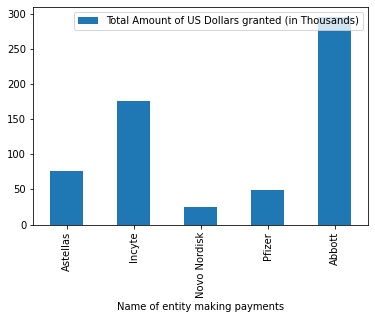

In [257]:
sum_df = pd.DataFrame([['Astellas', IM_sum/1000], ['Incyte', Derm_sum/1000], ['Novo Nordisk', NN9535_sum/1000], ['Pfizer', breastcancer_sum/1000], ['Abbott', covid_sum/1000]], columns = ['Name of entity making payments', 'Total Amount of US Dollars granted (in Thousands)'])
sum_df.plot.bar(x = 'Name of entity making payments', y = 'Total Amount of US Dollars granted (in Thousands)')

In [258]:
ownership_payments = pd.read_csv('data1.csv')
ownership_payments.head(5)

,change_type,physician_profile_id,physician_first_name,physician_middle_name,physician_last_name,physician_name_suffix,recipient_primary_business_street_address_line1,recipient_primary_business_street_address_line2,recipient_city,recipient_state,...,value_of_interest,terms_of_interest,submitting_applicable_manufacturer_or_applicable_gpo_name,applicable_manufacturer_or_applicable_gpo_making_payment_id,applicable_manufacturer_or_applicable_gpo_making_payment_name,applicable_manufacturer_or_applicable_gpo_making_payment_state,applicable_manufacturer_or_applicable_gpo_making_payment_country,dispute_status_for_publication,interest_held_by_physician_or_an_immediate_family_member,payment_publication_date
0,UNCHANGED,47094,DAVID,Y.,BADAWI,NaN,1614 W CENTRAL RD,SUITE 107,ARLINGTON HEIGHTS,IL,...,9915428.48,Common Stock,"Sight Sciences, Inc.",100000136569,"Sight Sciences, Inc.",CA,United States,No,Physician Covered Recipient,01/21/2022
1,UNCHANGED,155029,Wayne,NaN,Paprosky,NaN,1 WESTBROOK CORPORATE CTR,#240,Westchester,IL,...,135175.59,None,Intellijoint Surgical Inc.,100000321808,Intellijoint Surgical Inc.,NaN,Canada,No,Physician Covered Recipient,01/21/2022
2,UNCHANGED,1033629,Brett,NaN,Trockman,NaN,610 E Roosevelt Rd,Suite 203,Wheaton,IL,...,84936.38,Common Stock,UroGPO LLC,100000046250,UroGPO LLC,OH,United States,No,Physician Covered Recipient,01/21/2022
3,UNCHANGED,161867,Christopher,NaN,Coogan,NaN,1725 W Harrison St,Suite 758,Chicago,IL,...,84936.38,Common Stock,UroGPO LLC,100000046250,UroGPO LLC,OH,United States,No,Physician Covered Recipient,01/21/2022
4,UNCHANGED,1179193,Daniel,NaN,Dalton,NaN,676 N St Clair,Suite 1835,Chicago,IL,...,84936.38,Common Stock,UroGPO LLC,100000046250,UroGPO LLC,OH,United States,No,Physician Covered Recipient,01/21/2022


175.0


Text(0, 0.5, 'Physician Specialty')

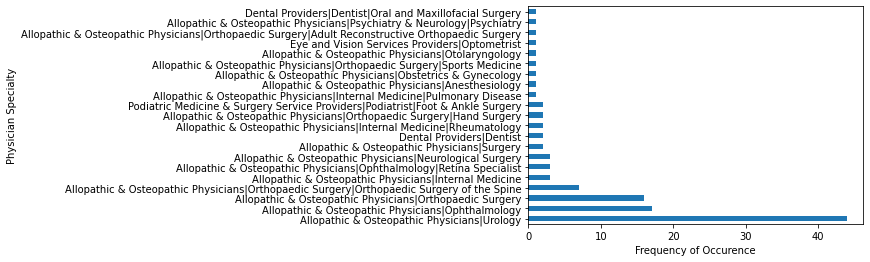

In [259]:
graph_df = ownership_payments[['total_amount_invested_usdollars', 'physician_specialty']] 
value_count_urology = graph_df['physician_specialty'].value_counts()[0]
value_count_orthopaedic = graph_df['physician_specialty'].value_counts()[2]
percent_increase_freq = ((value_count_urology - value_count_orthopaedic) / value_count_orthopaedic) * 100
print(percent_increase_freq)
value_counts_plot = graph_df['physician_specialty'].value_counts().plot(kind = 'barh')
value_counts_plot.set_xlabel('Frequency of Occurence')
value_counts_plot.set_ylabel('Physician Specialty')

21017.46394691601


Text(0, 0.5, 'Physician Specialty')

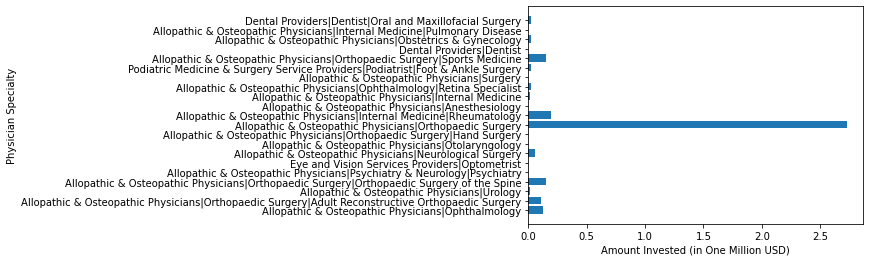

In [260]:
def parse_func(string):
    new_df = graph_df.loc[graph_df['physician_specialty'] == string]
    return (new_df['total_amount_invested_usdollars'].sum() / 1e6)

sums_arr = []
for i in range(0, len(graph_df['physician_specialty'].unique())):
    sums_arr.append(parse_func(graph_df['physician_specialty'].unique()[i]))

percent_increase_sum = ((sums_arr[9] - sums_arr[2]) / sums_arr[2]) * 100
print(percent_increase_sum)

plt.barh(graph_df['physician_specialty'].unique(), sums_arr)
plt.xlabel('Amount Invested (in One Million USD)')
plt.ylabel('Physician Specialty')



In [261]:
investor_orthopaedics_2020 = ownership_payments.loc[ownership_payments['physician_specialty'] == 'Allopathic & Osteopathic Physicians|Orthopaedic Surgery']['applicable_manufacturer_or_applicable_gpo_making_payment_name'].value_counts()
investor_orthopaedics_2020_sum = ownership_payments.loc[ownership_payments['physician_specialty'] == 'Allopathic & Osteopathic Physicians|Orthopaedic Surgery']['total_amount_invested_usdollars'].sum()
print(investor_orthopaedics_2020_sum)
investor_orthopaedics_2020

2731856.5


Vertebral Technologies, Inc.         6
Consensus Orthopedics, Inc.          2
Joint Active Systems, Inc.           2
Innovation Technologies Inc          1
Catalyst OrthoScience                1
CROSSROADS EXTREMITY SYSTEMS, LLC    1
4WEB, INC.                           1
Nanovis LLC                          1
Romark Laboratories, LC              1
Name: applicable_manufacturer_or_applicable_gpo_making_payment_name, dtype: int64

In [263]:
ownership_payments_2017 = pd.read_csv('data2.csv')
investor_orthopaedics_2017 = ownership_payments_2017.loc[ownership_payments_2017['physician_specialty'] == 'Allopathic & Osteopathic Physicians|Orthopaedic Surgery']['applicable_manufacturer_or_applicable_gpo_making_payment_name'].value_counts()
investor_orthopaedics_2017_sum = ownership_payments_2017.loc[ownership_payments_2017['physician_specialty'] == 'Allopathic & Osteopathic Physicians|Orthopaedic Surgery']['total_amount_invested_usdollars'].sum()
print(investor_orthopaedics_2017_sum)
investor_orthopaedics_2017

1661975.75


Vertebral Technologies, Inc.    6
United Rheumatology             2
Joint Active Systems, Inc.      2
Arthrosurface Incorporated      1
Innovation Technologies Inc     1
Catalyst OrthoScience           1
Spinal Simplicity, LLC          1
ORTHOSENSOR INC.                1
Nanovis LLC                     1
4WEB, INC.                      1
SI-BONE, Inc.                   1
Romark Laboratories, LC         1
Name: applicable_manufacturer_or_applicable_gpo_making_payment_name, dtype: int64